# Biological Controls

Gene trajectories reflect expected biology for each disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
cd_counts = pd.read_csv('fig2_cd_counts.csv')
uc_counts = pd.read_csv('fig2_uc_counts.csv')

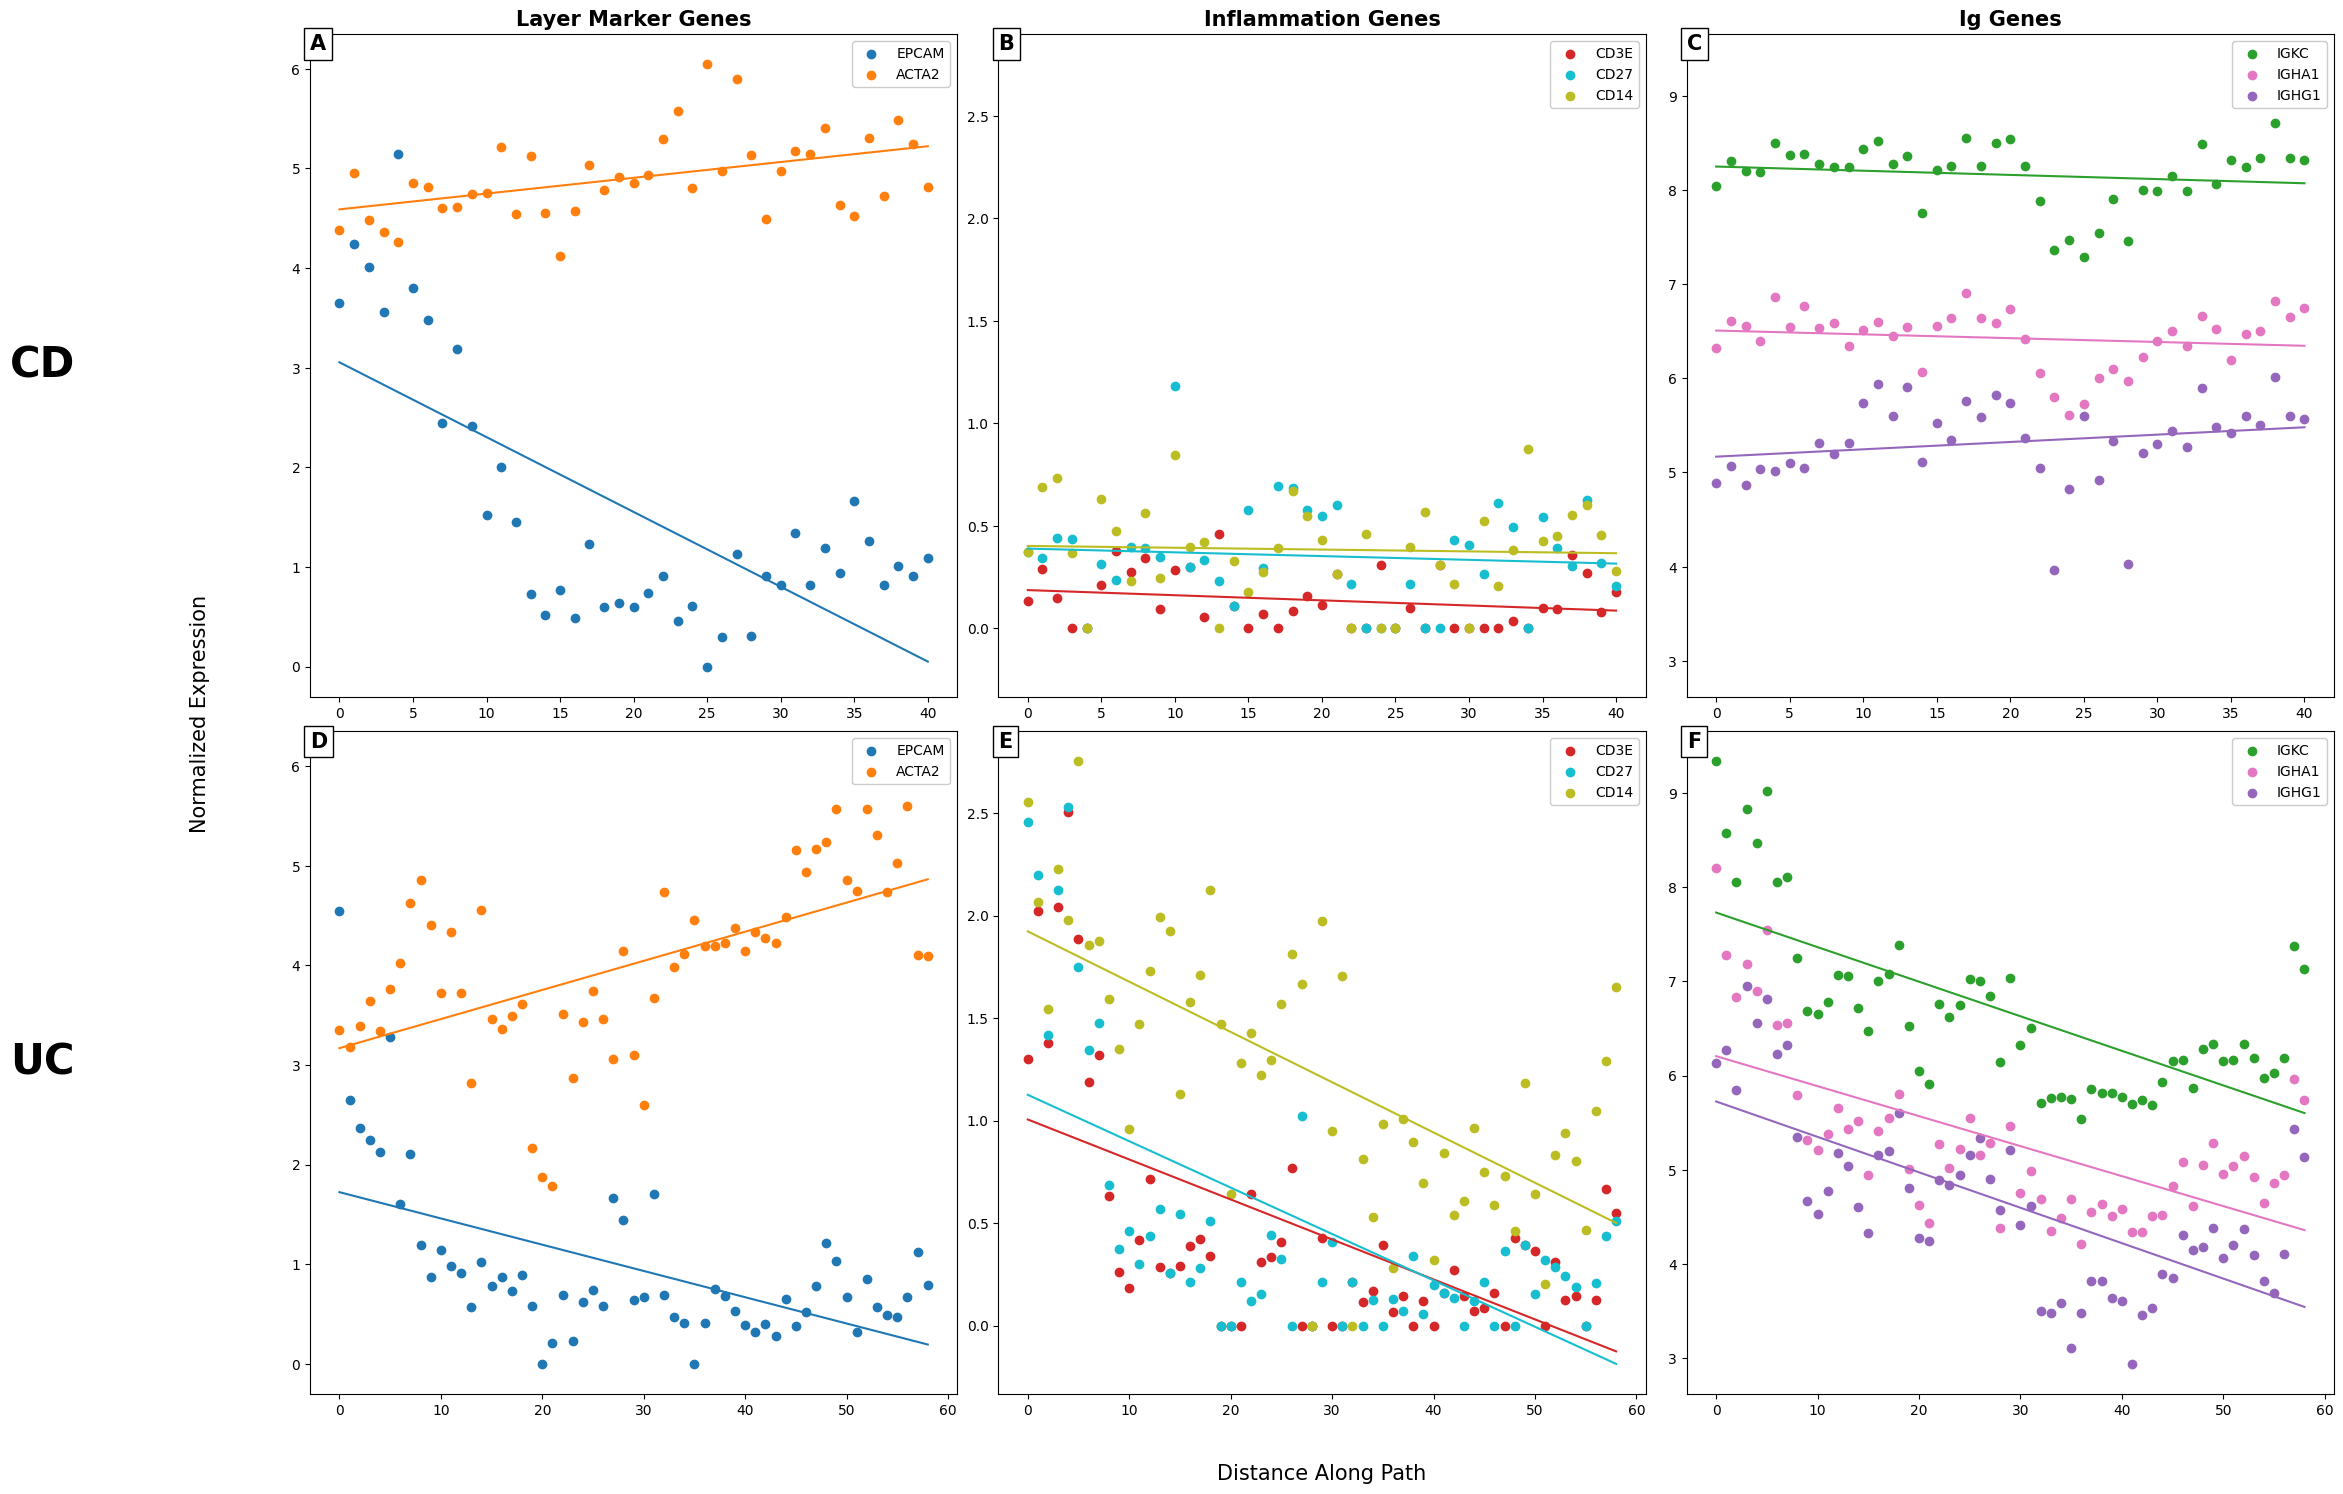

In [4]:
figsize = 8
fontsize = 15

plt.close()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(figsize*3, figsize*2))
ax1.sharey(ax4)
ax2.sharey(ax5)
ax3.sharey(ax6)

ax1.set_title('Layer Marker Genes', fontsize=fontsize, weight='bold')
ax2.set_title('Inflammation Genes', fontsize=fontsize, weight='bold')
ax3.set_title('Ig Genes', fontsize=fontsize, weight='bold')

for ax, df in zip([ax1, ax4], [cd_counts, uc_counts]):
    for gene, color in zip(['EPCAM', 'ACTA2'], ['tab:blue', 'tab:orange']):
        path = np.arange(len(df))
        ax.scatter(path, df[gene], label=gene, color=color)
        ax.plot(path, np.poly1d(np.polyfit(path, df[gene], 1))(path), color=color)
    ax.legend(loc='upper right', framealpha=1)

for ax, df in zip([ax2, ax5], [cd_counts, uc_counts]):
    for gene, color in zip(['CD3E', 'CD27', 'CD14'], ['tab:red', 'tab:cyan', 'tab:olive']):
        path = np.arange(len(df))
        ax.scatter(path, df[gene], label=gene, color=color)
        ax.plot(path, np.poly1d(np.polyfit(path, df[gene], 1))(path), color=color)
    ax.legend(loc='upper right', framealpha=1)

for ax, df in zip([ax3, ax6], [cd_counts, uc_counts]):
    for gene, color in zip(['IGKC', 'IGHA1', 'IGHG1'], ['tab:green', 'tab:pink', 'tab:purple']):
        path = np.arange(len(df))
        ax.scatter(path, df[gene], label=gene, color=color)
        ax.plot(path, np.poly1d(np.polyfit(path, df[gene], 1))(path), color=color)
    ax.legend(loc='upper right', framealpha=1)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95, bottom=0.1)
ax1_bbox = ax1.get_position()
ax2_bbox = ax2.get_position()
ax3_bbox = ax3.get_position()
ax4_bbox = ax4.get_position()
ax5_bbox = ax5.get_position()
ax6_bbox = ax6.get_position()

dz1_y = ax1_bbox.height / 2 + ax1_bbox.ymin
fig.text(0.025, dz1_y, 'CD', fontsize=fontsize*2, weight='bold', va='center')

dz2_y = ax4_bbox.height / 2 + ax4_bbox.ymin
fig.text(0.025, dz2_y, 'UC', fontsize=fontsize*2, weight='bold', va='center')

ylabel_y = (ax1_bbox.ymin - ax4_bbox.ymax) / 2 + ax4_bbox.ymax
fig.text(0.1, ylabel_y, 'Normalized Expression', fontsize=fontsize, rotation=90, va='center')

xlabel_x = (ax5_bbox.xmax - ax5_bbox.xmin) / 2 + ax5_bbox.xmin
fig.text(xlabel_x, 0.05, 'Distance Along Path', fontsize=fontsize, ha='center', va='center')

fig.text(ax1_bbox.xmin, ax1_bbox.ymax, 'A', ha='left', va='top', fontsize=15, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax2_bbox.xmin, ax2_bbox.ymax, 'B', ha='left', va='top', fontsize=15, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax3_bbox.xmin, ax3_bbox.ymax, 'C', ha='left', va='top', fontsize=15, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax4_bbox.xmin, ax4_bbox.ymax, 'D', ha='left', va='top', fontsize=15, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax5_bbox.xmin, ax5_bbox.ymax, 'E', ha='left', va='top', fontsize=15, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax6_bbox.xmin, ax6_bbox.ymax, 'F', ha='left', va='top', fontsize=15, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})

fig.savefig('fig3.png')